Clear memory

In [1]:
%reset -f
import gc
gc.collect()

0

### Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
warnings.simplefilter("ignore", category=FutureWarning)
warnings.simplefilter("ignore", category=DeprecationWarning)
%matplotlib inline

# Load datasets


In [3]:
red = pd.read_csv('winequality-red.csv', encoding='utf-8', delimiter=';')
white = pd.read_csv('winequality-white.csv', encoding='utf-8', delimiter=';')

Concatenate datasets 

In [4]:
red.insert(loc=0, column='sort', value='red')
white.insert(loc=0, column='sort', value='white')

df = pd.concat([red, white], ignore_index=True, axis=0)

In [5]:
df.head()

,sort,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Check the shape of the dataset

In [6]:
df.shape

(6497, 13)

Check the main info about dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sort                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


Check some stats

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


Check missing values

In [9]:
df.isna().sum()

sort                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There is no missing values in the dataset!

Check number of unique values of each variable

In [10]:
df.nunique()

sort                      2
fixed acidity           106
volatile acidity        187
citric acid              89
residual sugar          316
chlorides               214
free sulfur dioxide     135
total sulfur dioxide    276
density                 998
pH                      108
sulphates               111
alcohol                 111
quality                   7
dtype: int64

Check for duplicated samples

In [11]:
df.duplicated().any()

True

Delete duplicated samples

In [12]:
df.drop_duplicates(inplace=True, ignore_index=True)

# Deleting outliers

We can use standart IQR


In [13]:
def remove_outliers(df:pd.DataFrame):

    numeric_features = df.select_dtypes(include=[np.number]).columns

    mask = np.ones(df.shape[0], dtype=bool)

    for feature in numeric_features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        mask &= (df[feature] >= lower_bound) & (df[feature] <= upper_bound)

    return df.loc[mask]

Create auxiliary dataframe

In [14]:
df_copy = df.copy()

Since target is categorical, it is better to filter outliers inside each category

In [15]:
df = df.groupby('quality', group_keys=False).apply(remove_outliers)

Check that target distribution didn't change dramatically after filtering outliers

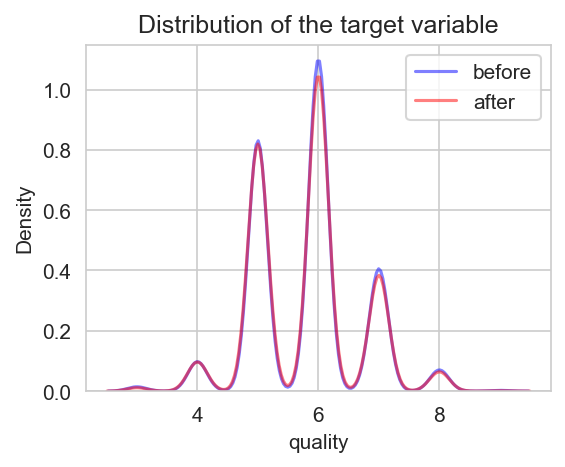

In [16]:
plt.figure(figsize=(4,3), dpi=150)
sns.kdeplot(data=df_copy, x='quality', alpha=0.5, label='before', color='blue')
sns.kdeplot(data=df, x='quality', alpha=0.5, label='after', color='red')
plt.legend()
plt.title('Distribution of the target variable')
plt.show()

Delete auxiliary variable to clear memory

In [17]:
del df_copy

# EDA

## Single variable analysis

Distribution of the features

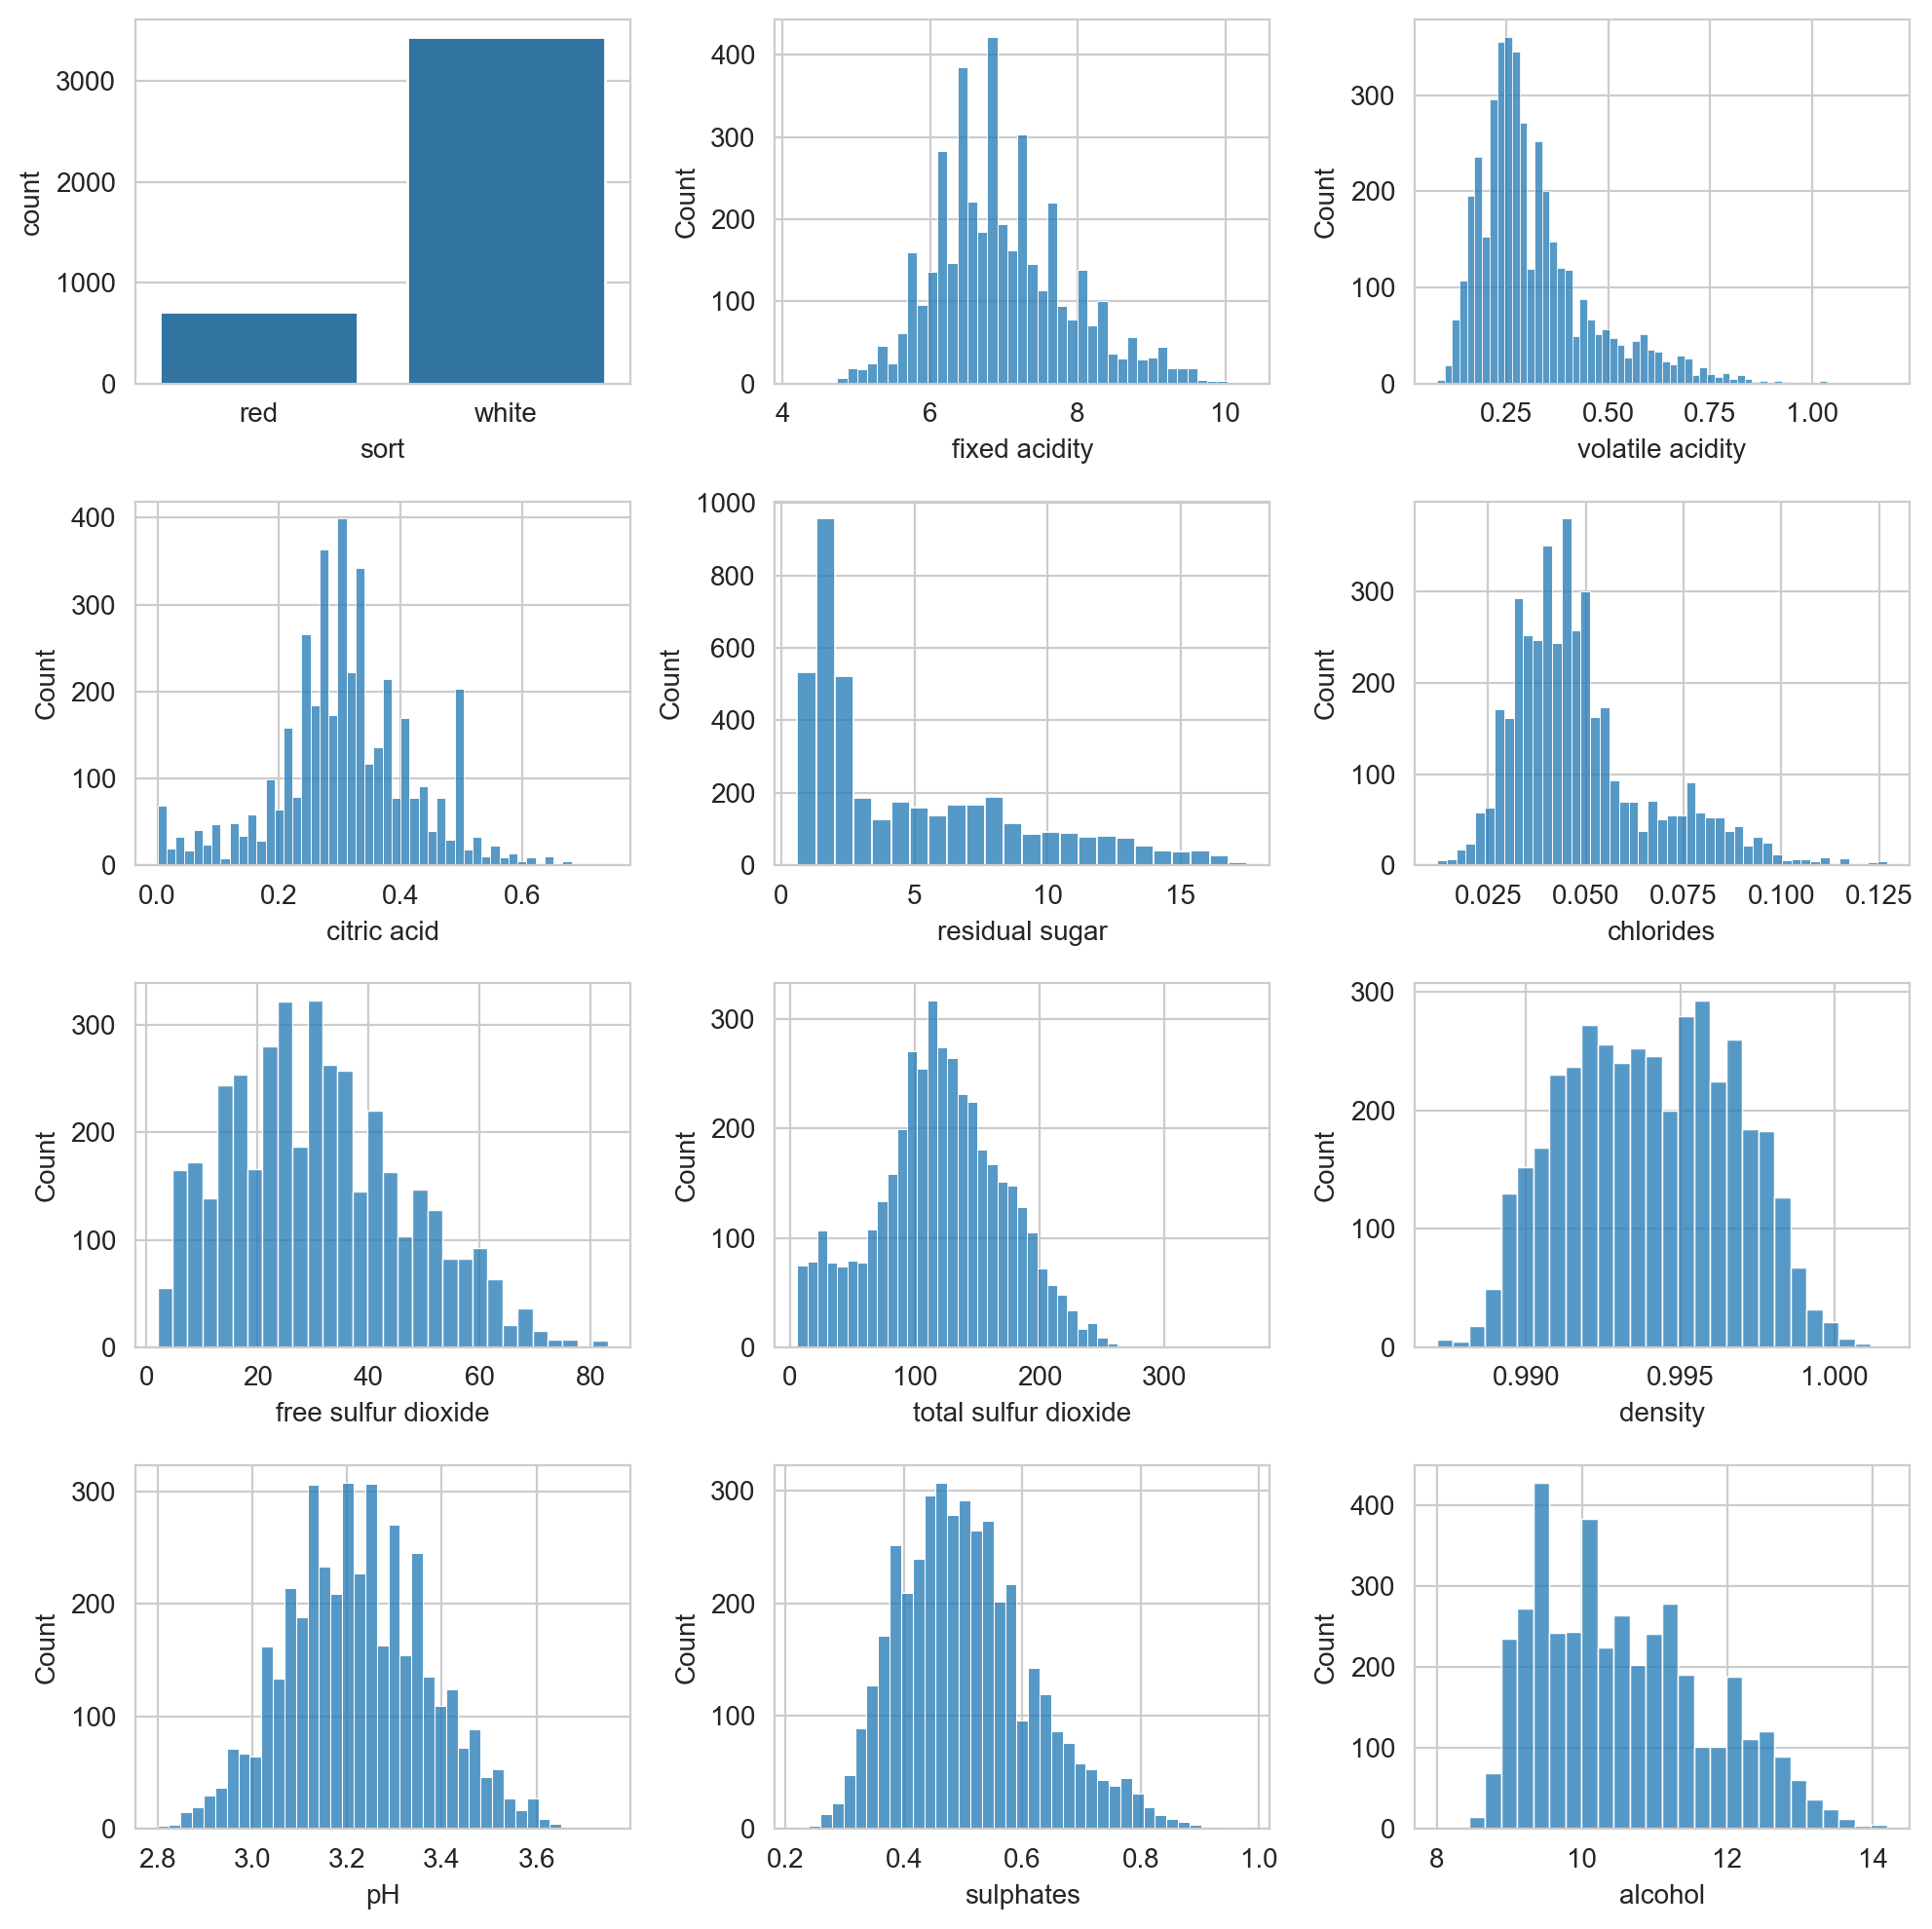

In [18]:
plt.figure(figsize=(10,10), dpi=200)

plt.subplot(4,3,1)
sns.countplot(data=df, x='sort')

for i,f in enumerate(df.drop(columns=['sort', 'quality']).columns):
    plt.subplot(4,3,2+i)
    sns.histplot(data=df, x=f)

plt.tight_layout()
plt.show()

Features 'volatile acidity', 'chlorides' and 'residual sugar' have noticable right skew. They must be normalized. There are much less red wine samples then white wine samples. Overall, features most likely to be either normally distributed or have right skew. There are no left skewed features

Now, let's plot the distribution of the target

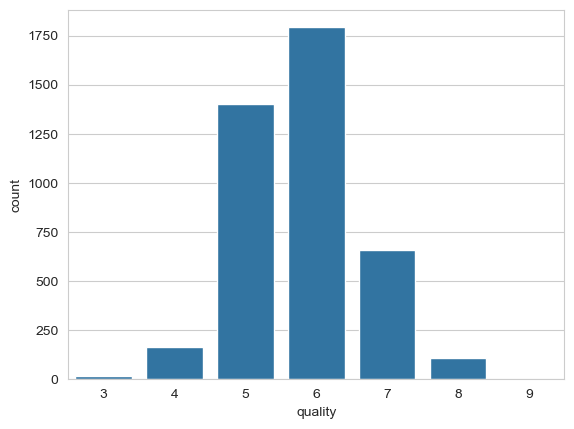

In [19]:
sns.countplot(data=df, x='quality')
plt.show()

Distribution of the target variable is quite close to normal. There are much more mid quality wines, then good or poor quality. Wine with the quality of 6 is the most common

## Multivariable analysis

First, we can plot relationship between each feature and the target variable

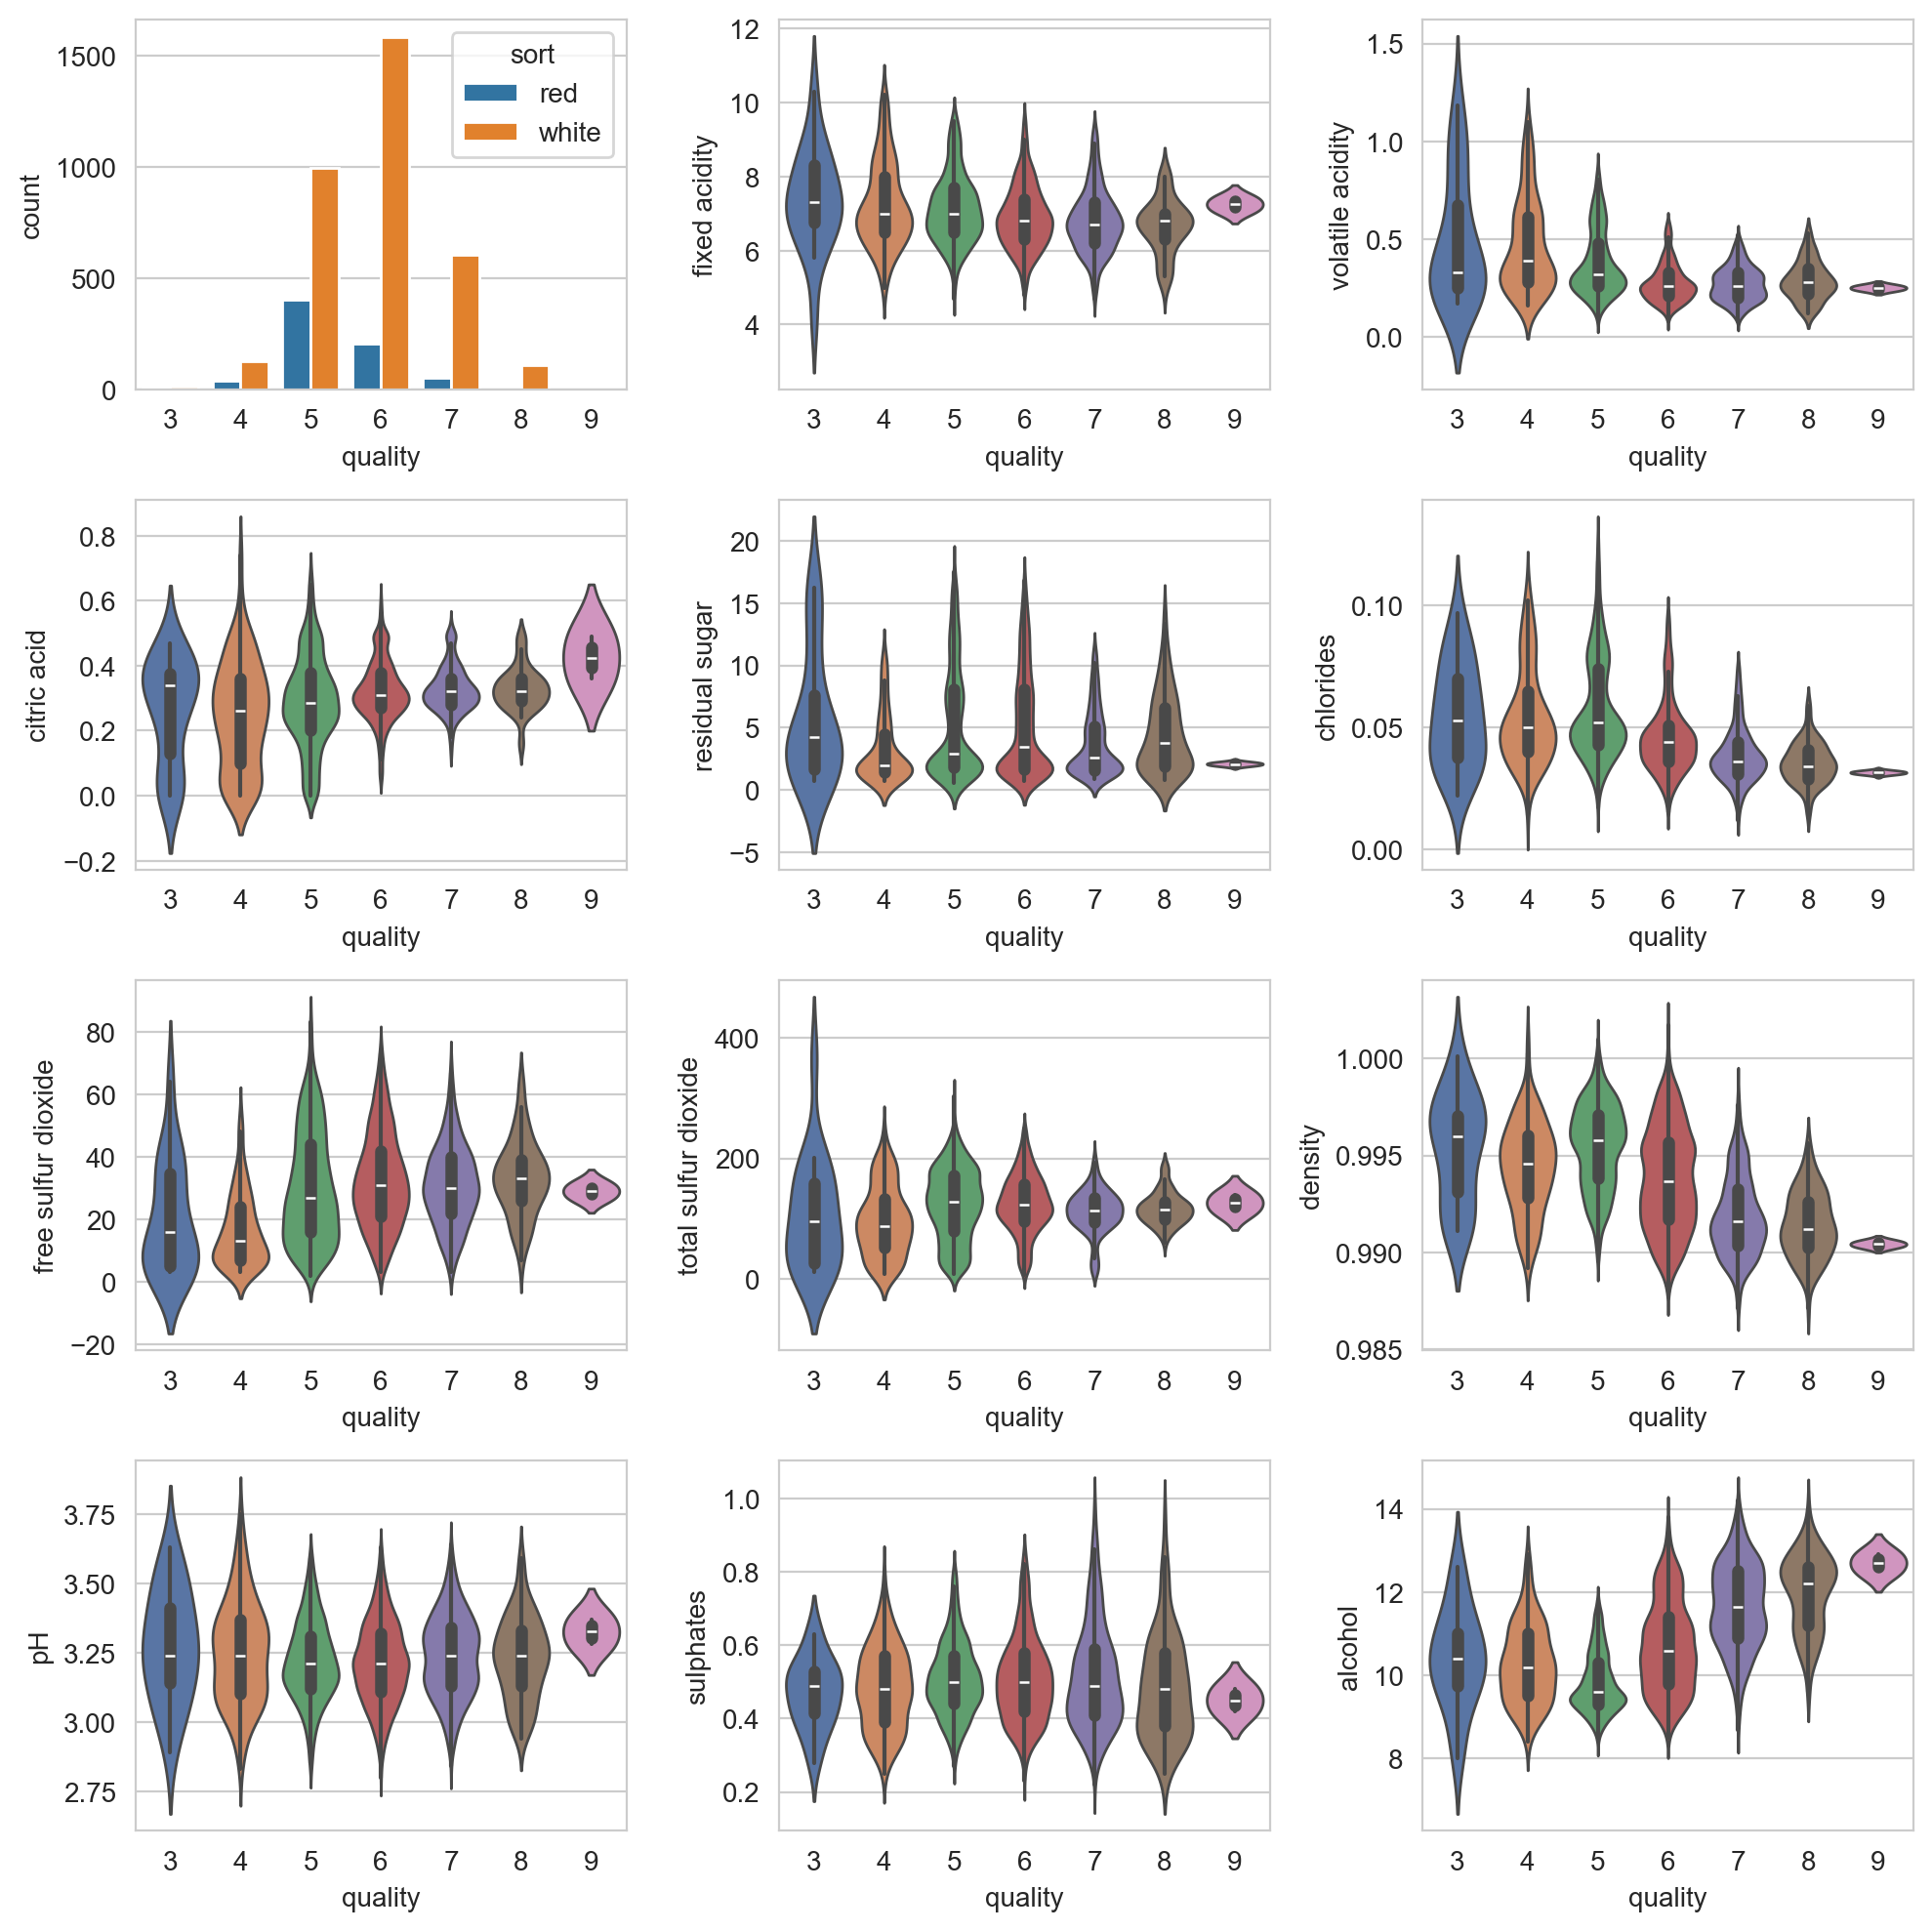

In [20]:
plt.figure(figsize=(10,10), dpi=200)

plt.subplot(4,3,1)
sns.countplot(data=df, x='quality', hue='sort')

for i,f in enumerate(df.drop(columns=['sort','quality']).columns):
    plt.subplot(4,3,2+i)
    sns.violinplot(
        data=df,
        x='quality',
        y=f,
        palette='deep',
        hue='quality',
        legend=False,
        linewidth=1,
        alpha=1,
        inner='box',
        orient='v',
    )

plt.tight_layout()
plt.show()

Some features like 'alcohol' and 'density' seem to have strong corellation with the target, while other like 'ph' seem to have very poor correlation. <br> Observations: <br> The highest quality wine has the highest median 'alcohol' and 'critic acis' value. <br> The lowest quality wine has the highest median 'residual sugar' value.

### Correlation matrix

We can plot correlation matrix to see which features have linear correlation 

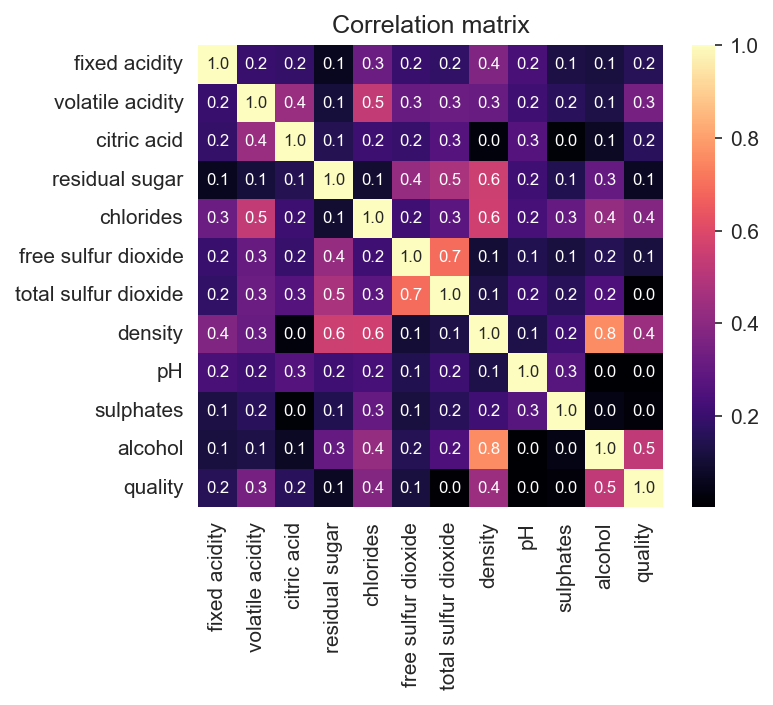

In [21]:
plt.figure(figsize=(5,4), dpi=150)
sns.heatmap(df.select_dtypes(include=[np.number]).corr().abs(),
            cmap='magma',
            annot=True,
            fmt=".1f",
            annot_kws={"size": 8})
plt.title('Correlation matrix')
plt.show()

Some features have very strong correlation with each other, and some features have very low correlation with target variable. We need to consider PCA to reduce dimesionality and redundant collinearity. For example, 'density' is highly correlated with 'alcohol', 'chlorides' and 'residual sugar'.

### Mutual information

First, let's see mutual info between target variable and features 

In [22]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.preprocessing import LabelEncoder

def mutual_info_target(df:pd.DataFrame, target:str) -> None:

    encoder = LabelEncoder()

    for col in df.select_dtypes(include=['object', 'category']).columns:
        df[col] = encoder.fit_transform(df[col])

    X = df.loc[:, df.columns != target]
    y = df[target]

    if y.dtype == int:
        mi_scores = pd.Series(mutual_info_classif(X, y), index=X.columns)
    else:
        mi_scores = pd.Series(mutual_info_regression(X, y), index=X.columns)


    plt.figure(figsize=(15,3), dpi=200)
    sns.barplot(mi_scores.sort_values(ascending=False), palette='deep')
    plt.title(f'Mutual information for {target}')
    plt.xticks(rotation=45)
    plt.show()

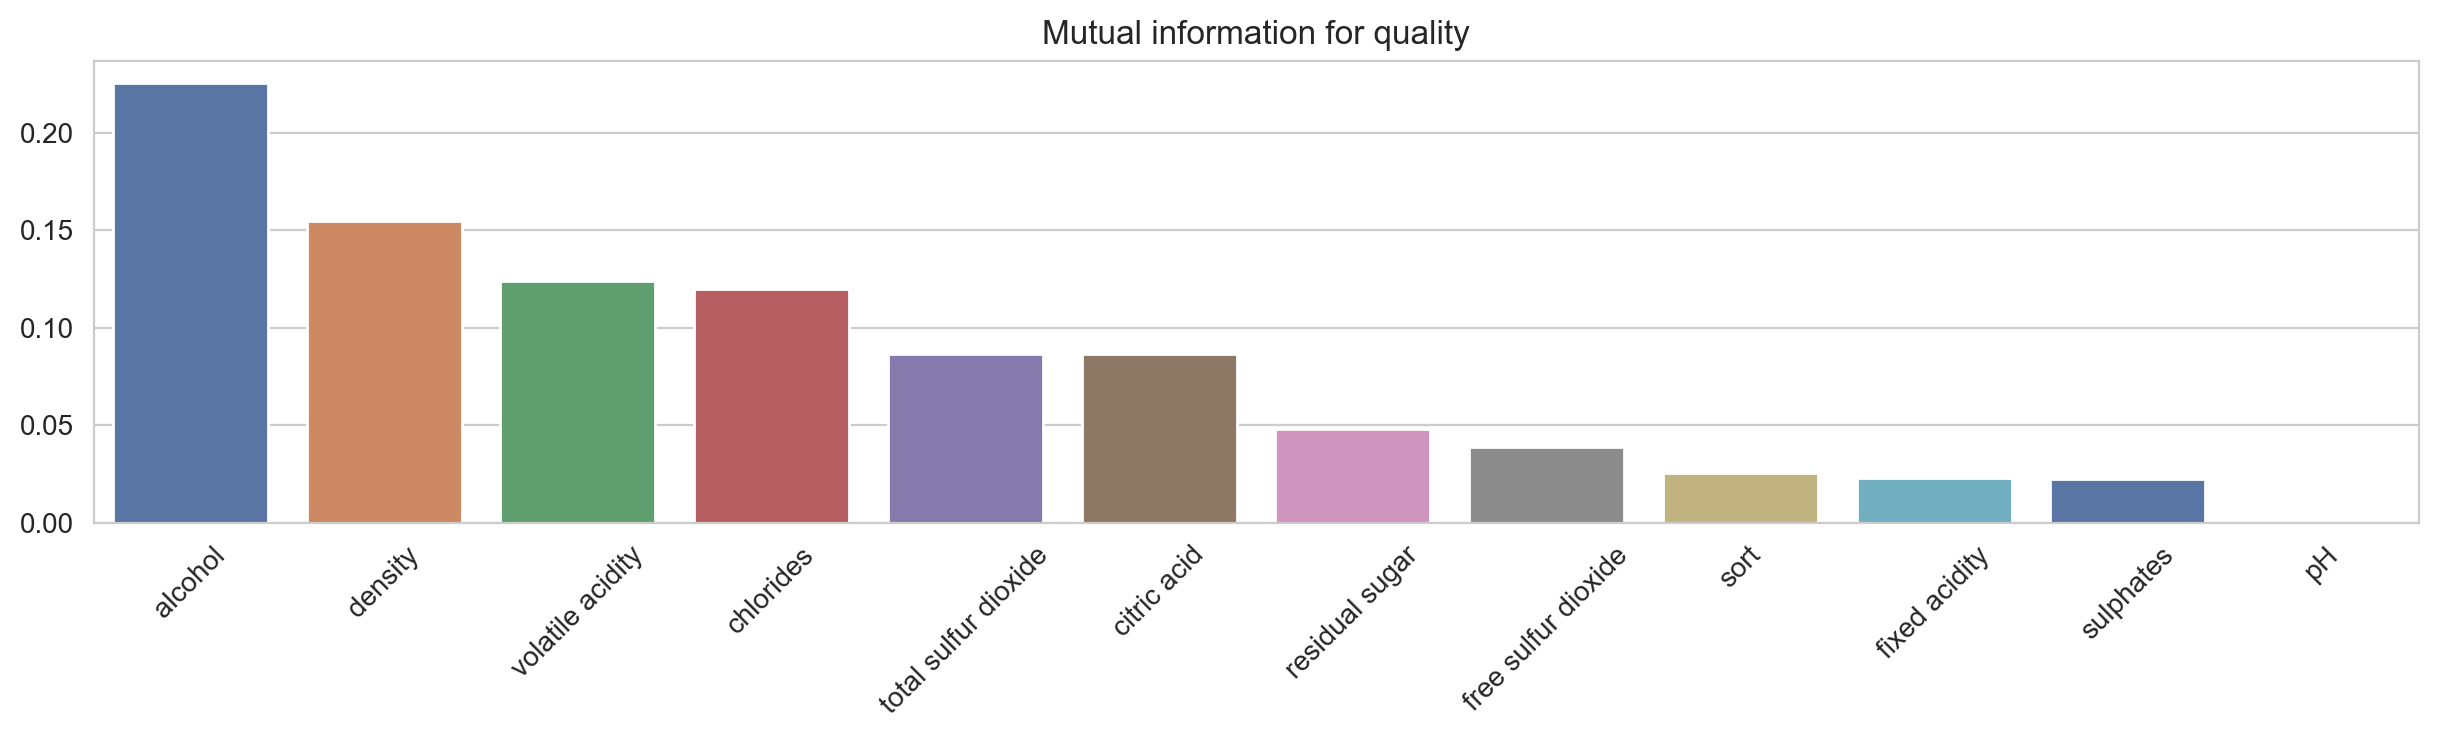

In [23]:
mutual_info_target(df.copy(), 'quality')

'alcohol', 'density' and 'volatile acidity' are the most important for target, while 'sort', 'pH' and 'fixed acidity' are the less important. 

Now, let's plot the mutual info matrix 

In [24]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

def mutual_info_heatmap(df:pd.DataFrame) -> None:

    encoder = LabelEncoder()

    for col in df.select_dtypes(include=['object', 'category']).columns:
        df[col] = encoder.fit_transform(df[col])

    mi_df = pd.DataFrame()

    for col in df.columns:

        X = df.drop(columns=col)
        y = df[col]

        if y.dtype == int:
            mi_scores = pd.Series(mutual_info_classif(X, y), index=X.columns)
        else:
            mi_scores = pd.Series(mutual_info_regression(X, y), index=X.columns)

        if mi_df.empty:
            mi_scores = pd.concat([pd.Series([np.nan], index=[col]), mi_scores])

        mi_df[col] = mi_scores

    plt.figure(figsize=(5,4), dpi=150)
    sns.heatmap(data=mi_df,
                vmax=mi_df.max().max(),
                vmin=mi_df.min().min(),
                cmap='magma',
                annot=True,
                fmt=".1f",
                annot_kws={"size": 8})
    plt.title('Mutual information')
    plt.show()


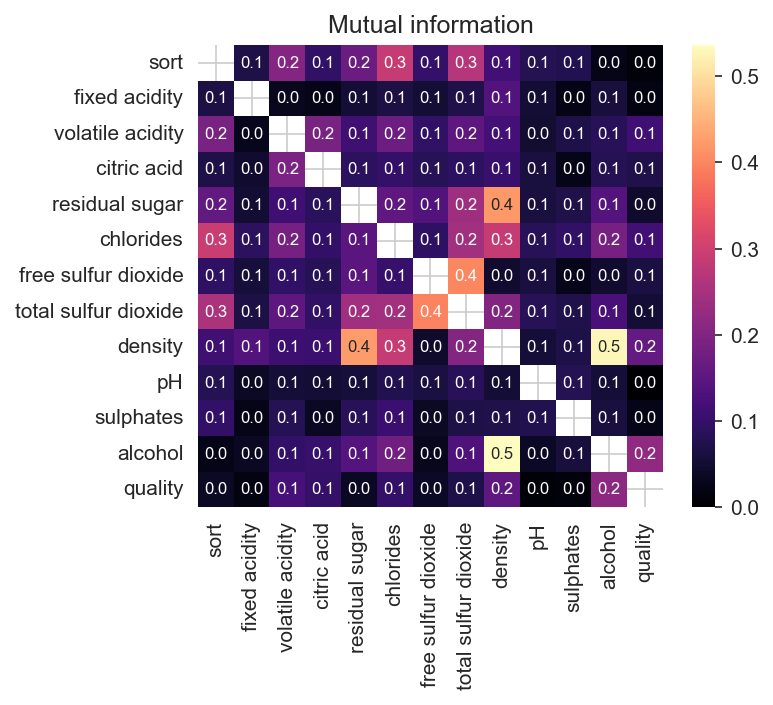

In [25]:
mutual_info_heatmap(df.copy())

Indeed, there are some features like 'pH' with very low influence on other feature and target variable. For machine learning we can either just drop them or use PCA

## More questions about the data

1) How are density and alcohol related for each wine sort?
2) Are there any trend in the 'pH' and 'quality' relation?
3) What wine sort has more chlorides on average?

### 1. Let's plot the relationship between 'alcohol' and 'density' with the 'sort' hue

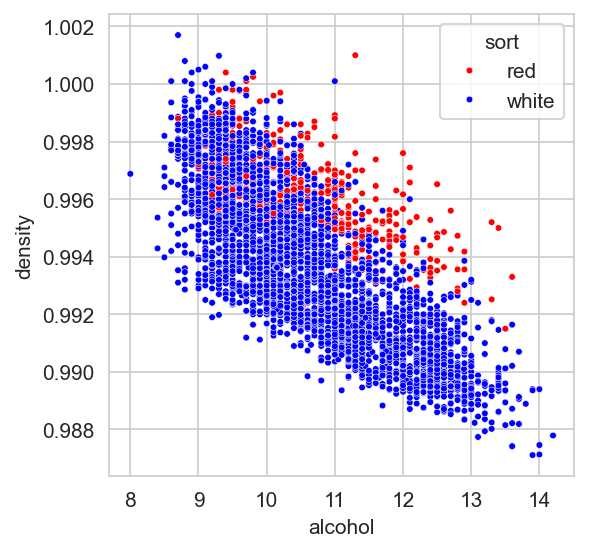

In [26]:
plt.figure(figsize=(4,4), dpi=150)
sns.scatterplot(
    data=df,
    x='alcohol',
    y='density',
    hue='sort',
    palette={'white': 'blue', 'red': 'red'},
    alpha=1,
    s=10,
)

plt.show()

Both wine sorts have noticable trend: the higher alcohol it contains the lower density it has

### 2. Let's plot the barchart 

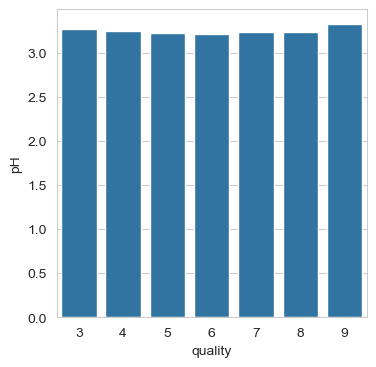

In [27]:
plt.figure(figsize=(4,4), dpi=100)
sns.barplot(
    data=df,
    x='quality',
    y='pH',
    errorbar=None
)

plt.show()

As we can see from this chart there is no clear trend 

### 3. Let's plot the barchart 

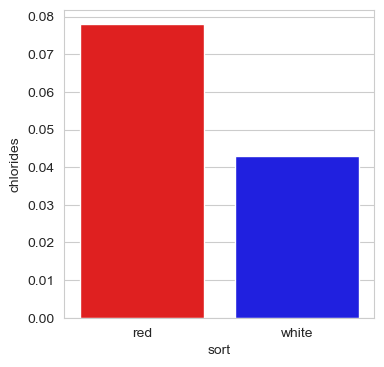

In [28]:
plt.figure(figsize=(4,4), dpi=100)
sns.barplot(
    data=df,
    x='sort',
    y='chlorides',
    errorbar=None,
    estimator='mean',
    hue='sort',
    palette={'white': 'blue', 'red': 'red'},
)
plt.show()

It is clear, that red wines contain more chlorides on average

### Summary

In this exploratory data analysis (EDA), we have thoroughly examined the Wine Quality dataset. The key steps included:

- Merging and cleaning the datasets for red and white wines.
- Removing duplicates and outliers to ensure data quality.
- Conducting univariate and multivariate analyses to understand feature distributions.
- Visualizing the relationships between features and identifying potential patterns.
- Performing a correlation analysis to detect strong linear dependencies.

This analysis provides a solid foundation for future modeling and highlights the main characteristics of the dataset.
